### Q1. What is the mathematical formula for a linear SVM?

A linear SVM aims to find the best separating hyperplane:

**Formula:**

f(x) = wᵀx + b

Where:
- w = weight vector
- x = feature vector
- b = bias term

The prediction is:
- If f(x) ≥ 0 → Class +1
- If f(x) < 0 → Class -1

### Q2. What is the objective function of a linear SVM?

**Objective Function:**

Minimize:
(1/2)‖w‖² + C Σ ξᵢ

Subject to:
yᵢ(wᵀxᵢ + b) ≥ 1 - ξᵢ  
ξᵢ ≥ 0

- C = Regularization parameter
- ξᵢ = Slack variables (for misclassification)

### Q3. What is the kernel trick in SVM?

The **kernel trick** allows SVM to solve non-linear problems by using a function to map data into a higher-dimensional space **without computing it explicitly**.

**Common kernels:**
- Linear: K(x, x′) = xᵀx′
- Polynomial: K(x, x′) = (xᵀx′ + c)^d
- RBF (Gaussian): K(x, x′) = exp(-γ‖x − x′‖²)


### Q4. What is the role of support vectors in SVM?

**Support vectors** are the critical data points closest to the decision boundary. They define the hyperplane's position and margin.

- If support vectors change, the decision boundary changes.
- All other points don’t affect the model directly.

### Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM

Below is a visualization using synthetic data:

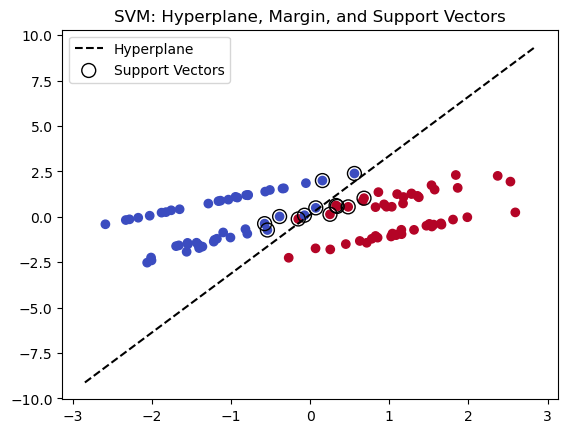

In [11]:
# Graphical Illustration
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, random_state=42)

model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
ax = plt.gca()
xlim = ax.get_xlim()
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - (model.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k--', label="Hyperplane")
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label="Support Vectors")
plt.title("SVM: Hyperplane, Margin, and Support Vectors")
plt.legend()
plt.show()


### Q6. SVM Implementation through Iris Dataset

Steps:
- Load dataset
- Split into train/test
- Train linear SVM
- Check accuracy
- Plot decision boundaries

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load data and filter binary classes
iris = load_iris()
X = iris.data[:, :2]  # only use 2 features for plotting
y = iris.target
X = X[y != 2]
y = y[y != 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# SVM Model
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


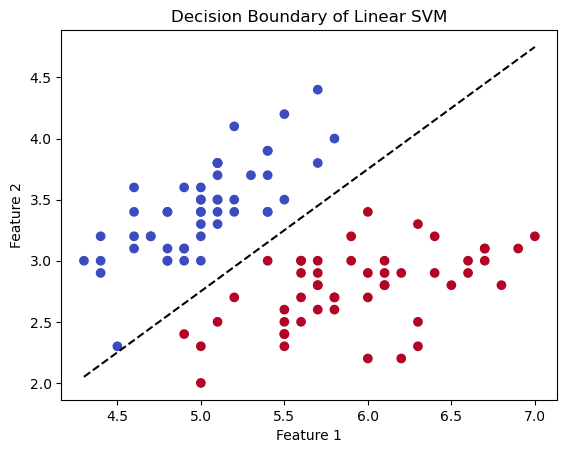

In [16]:
# Plot decision boundary
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_plot = -(w[0] * x_plot + b) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.plot(x_plot, y_plot, 'k--')
plt.title("Decision Boundary of Linear SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Try Different Values of Regularization Parameter C

In [19]:
for c_val in [0.01, 0.1, 1, 10]:
    model = SVC(kernel='linear', C=c_val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"C = {c_val} -> Accuracy: {acc:.2f}")

C = 0.01 -> Accuracy: 0.44
C = 0.1 -> Accuracy: 1.00
C = 1 -> Accuracy: 1.00
C = 10 -> Accuracy: 1.00


### Bonus Task: Implement Linear SVM from Scratch
(Simplified version using gradient descent)

In [22]:
class LinearSVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# Train custom SVM
custom_svm = LinearSVM()
custom_svm.fit(X_train, y_train)
custom_preds = custom_svm.predict(X_test)

# Compare
print("Scratch SVM Accuracy:", np.mean(custom_preds == y_test))

Scratch SVM Accuracy: 0.44
